# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [254]:
import pandas as pd
import numpy as np

In [255]:
data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
data

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
cols = []

for i in data.columns:
    i = i.lower()
    i = i.replace(' ','_')
    if i == 'st':
        i = 'state'
    cols.append(i)

data.columns = cols
data

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [257]:
#Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", 
#which need to be standardized, for example, to "M" and "F".

In [258]:
data['gender'].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [259]:
def cleanGender(x):
    if x in ['Male','M']:
        return 'M'
    if x in ['female','F', 'Female']:
        return 'F'
    else:
        return 'U'


data['gender'] = list(map(cleanGender, data['gender']))

data['gender'].unique()

array(['U', 'F', 'M'], dtype=object)

In [260]:
#State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"

In [261]:
data['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [262]:
def cleanState(x):
    if x == 'AZ':
        return 'Arizona'
    if x == 'WA':
        return 'Washington'
    if x == 'Cali':
        return 'California'
    else:
        return x


data['state'] = list(map(cleanState, data['state']))

data['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', nan],
      dtype=object)

In [263]:
#In education, "Bachelors" could be replaced by "Bachelor"

In [264]:
data['education'].unique()

array(['Master', 'Bachelor', 'High School or Below', 'College',
       'Bachelors', 'Doctor', nan], dtype=object)

In [265]:
def cleanEdu(x):
    if x == 'Bachelors':
        return 'Bachelor'
    return x


data['education'] = list(map(cleanEdu, data['education']))

data['education'].unique()

array(['Master', 'Bachelor', 'High School or Below', 'College', 'Doctor',
       nan], dtype=object)

In [266]:
#In Customer Lifetime Value, delete the % character

In [267]:
data['customer_lifetime_value']

0               NaN
1        697953.59%
2       1288743.17%
3        764586.18%
4        536307.65%
           ...     
4003            NaN
4004            NaN
4005            NaN
4006            NaN
4007            NaN
Name: customer_lifetime_value, Length: 4008, dtype: object

In [268]:
def cleanCLV(x):
    x = str(x).replace('%','')
    return x


data['customer_lifetime_value'] = list(map(cleanCLV, data['customer_lifetime_value']))

data['customer_lifetime_value']

0              nan
1        697953.59
2       1288743.17
3        764586.18
4        536307.65
           ...    
4003           nan
4004           nan
4005           nan
4006           nan
4007           nan
Name: customer_lifetime_value, Length: 4008, dtype: object

In [269]:
#In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"

In [270]:
data['vehicle_class'].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car', nan], dtype=object)

In [271]:
def cleanVC(x):
    if x in ['Sports Car','Luxury SUV', 'Luxury Car']:
        return "Luxury"
    return x


data['vehicle_class'] = list(map(cleanVC, data['vehicle_class']))

data['vehicle_class'].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury', nan],
      dtype=object)

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [272]:
data

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,nan,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,U,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,U,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,U,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,U,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
#Customer lifetime value should be numeric

In [274]:
data['customer_lifetime_value'].dtypes

dtype('O')

In [275]:
data['customer_lifetime_value'] = pd.to_numeric(data['customer_lifetime_value'], errors='coerce')
data['customer_lifetime_value'].dtypes

dtype('float64')

In [276]:
#Number of open complaints has an incorrect format. 
#Look at the different values it takes with unique() and take the middle value. 
#As an example, 1/5/00 should be 5. 
#Number of open complaints is a string - remember you can use split() to deal with it and take the number you need. 
#Finally, since it should be numeric, cast the column to be in its proper type.

In [277]:
data['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [278]:
def cleanNOC(x):
    x = str(x)
    if x[1] == '/':
        x = x[2]
    return x


data['number_of_open_complaints'] = list(map(cleanNOC, data['number_of_open_complaints']))
data['number_of_open_complaints'] = pd.to_numeric(data['number_of_open_complaints'], errors='coerce')

data['number_of_open_complaints'].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4., nan])

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`.

In [279]:
data.isna().sum()

customer                     2937
state                        2937
gender                          0
education                    2937
customer_lifetime_value      2940
income                       2937
monthly_premium_auto         2937
number_of_open_complaints    2937
policy_type                  2937
vehicle_class                2937
total_claim_amount           2937
dtype: int64

In [280]:
data = data.dropna()

In [281]:
data.isna().sum()

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

In [282]:
data

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,825629.78,62902.0,69.0,0.0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,305955.03,38644.0,78.0,1.0,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,2031499.76,63209.0,102.0,2.0,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47,16061.0,88.0,0.0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11,79487.0,114.0,0.0,Special Auto,SUV,547.200000


## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [283]:
data.shape

(1068, 11)

In [284]:
data = data.drop_duplicates(keep='last')
data = data.reset_index()

In [285]:
data.shape

(1068, 12)

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [286]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [287]:
# Your code here

# Lab | Customer Analysis Round 3

In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1068 non-null   int64  
 1   customer                   1068 non-null   object 
 2   state                      1068 non-null   object 
 3   gender                     1068 non-null   object 
 4   education                  1068 non-null   object 
 5   customer_lifetime_value    1068 non-null   float64
 6   income                     1068 non-null   float64
 7   monthly_premium_auto       1068 non-null   float64
 8   number_of_open_complaints  1068 non-null   float64
 9   policy_type                1068 non-null   object 
 10  vehicle_class              1068 non-null   object 
 11  total_claim_amount         1068 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 100.3+ KB


In [289]:
data.describe()

,index,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
count,1068.000000,1.068000e+03,1068.000000,1068.000000,1068.000000,1068.000000
mean,535.504682,7.936903e+05,39315.411985,192.691948,0.395131,405.870113
std,308.688256,6.434784e+05,30484.373979,1603.241719,0.884764,292.917158
min,1.000000,2.004351e+05,0.000000,61.000000,0.000000,0.382107
25%,268.750000,4.034080e+05,14072.000000,68.000000,0.000000,204.071460
50%,535.500000,5.881742e+05,36226.000000,82.500000,0.000000,355.200000
75%,802.250000,8.962872e+05,64668.750000,109.250000,0.000000,532.800000
max,1070.000000,5.816655e+06,99960.000000,35354.000000,5.000000,2893.239678


In [290]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

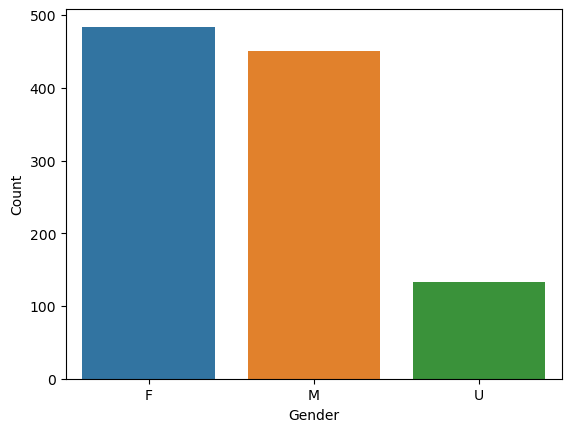

In [291]:
#Show a plot of the Gender breakdown.

sns.countplot(x='gender', data=data)

plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

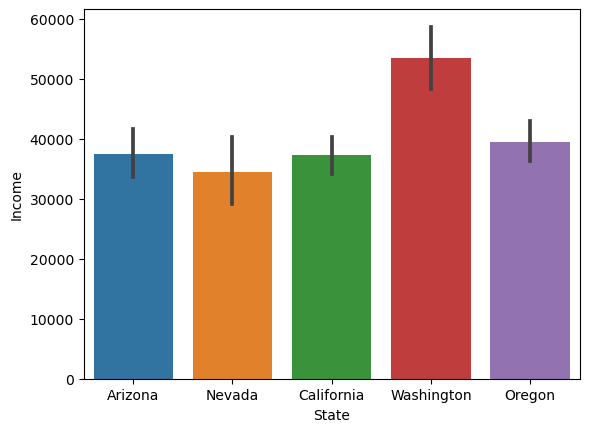

In [292]:
#Show a plot of Income by State.

sns.barplot(x='state', y='income', data=data)

plt.xlabel('State')
plt.ylabel('Income')

plt.show()

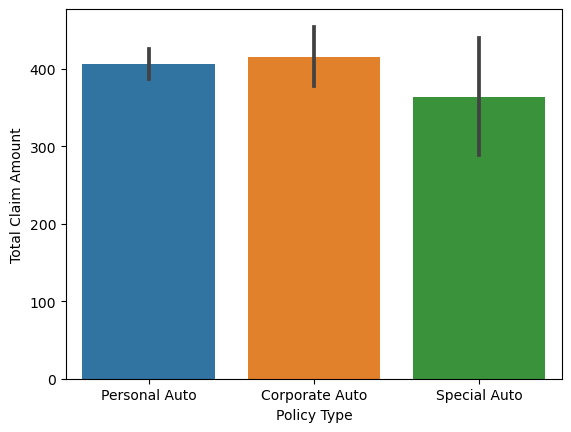

In [293]:
#Show a plot of the Policy Type by the Total Claim Amount.

sns.barplot(x='policy_type', y='total_claim_amount', data=data)

plt.xlabel('Policy Type')
plt.ylabel('Total Claim Amount')

plt.show()

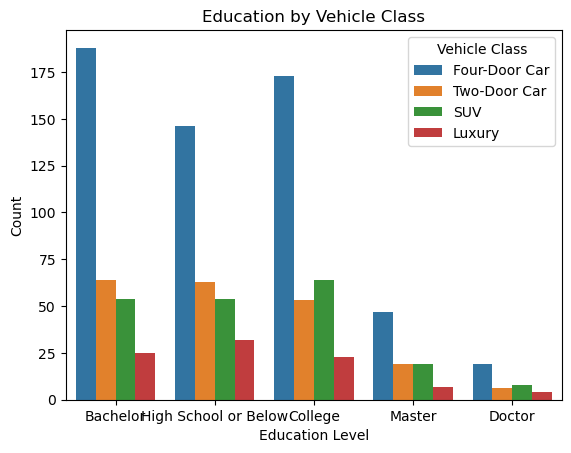

In [294]:
#Show a plot of the Education by Vehicle Class.

sns.countplot(x='education', hue='vehicle_class', data=data)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education by Vehicle Class')

plt.legend(title='Vehicle Class')

<ul>
    Insights that I established from these plots:
  <li>  There is no significant gender advantage. If U remains undefined as a gender, there is only a slight advantage of the male gender over the female one. </li>
  <li>  Plot of 'Income by State' shows that the highest income is in state of Washington (about 54000). The remaining states have an income of around 35000 to 40000.</li>
    <li>  The total claim amount does not differ much between different types of policies. The 'Special auto' policy has a slightly lower total claim amount than 'Corporate Auto' and 'Personal Auto' policies.</li>
    <li>  The plot 'Education by Vehicle Class' clearly shows that there are the greatest number of four-door cars (in each education group) and the least number of luxury cars. The group with the lowest number of cars has a doctorate and then a master's degree, but this may be due to the fact that fewer people have higher education. </li>

</ul>


# Lab 4

In [295]:
dataTypes = data.dtypes
dataTypes

index                          int64
customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints    float64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [296]:
numerical = data.select_dtypes(include=['int64', 'float64'])

categorical = data.select_dtypes(include=['object'])

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

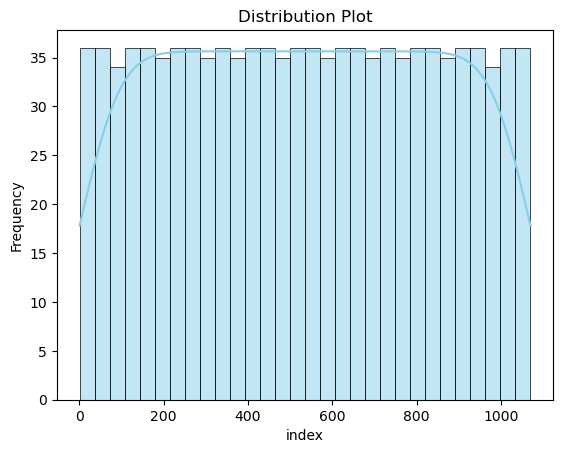

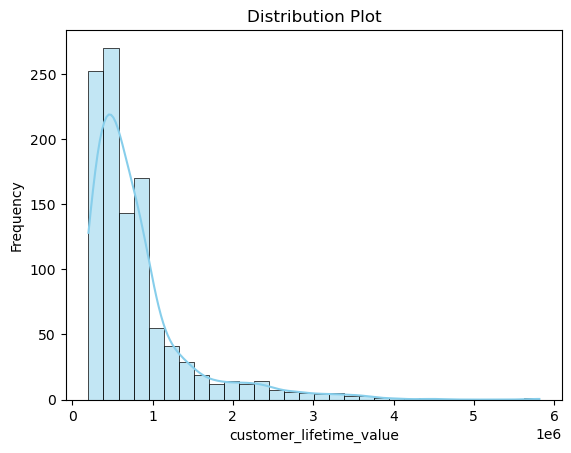

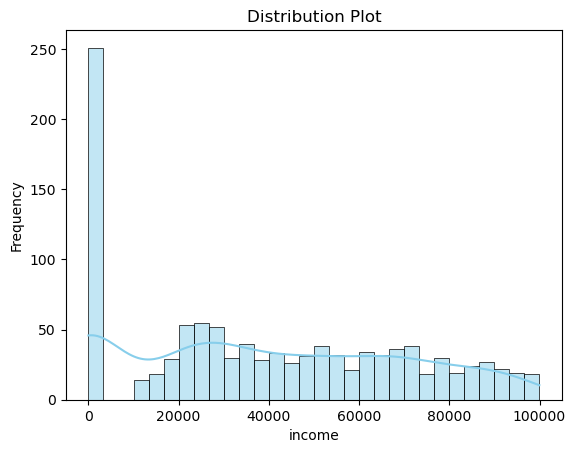

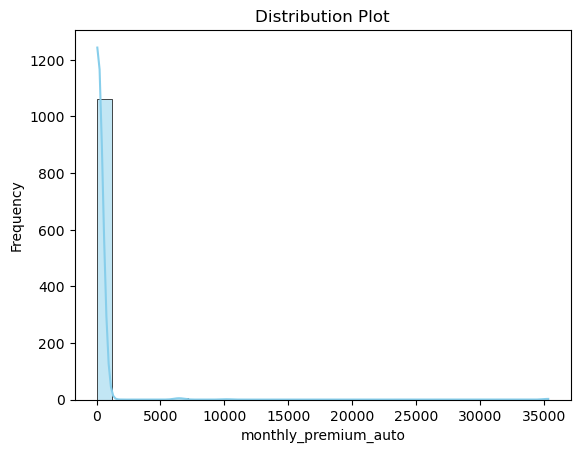

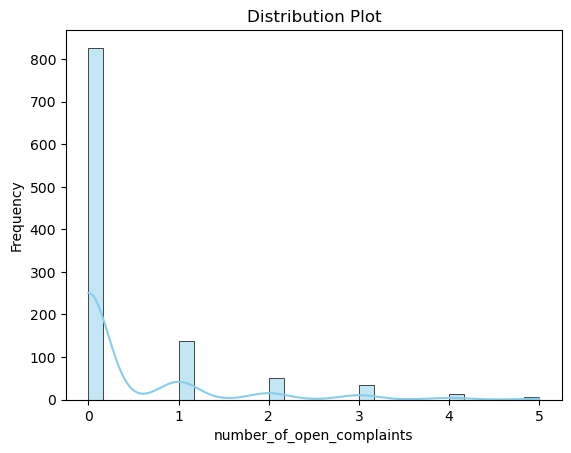

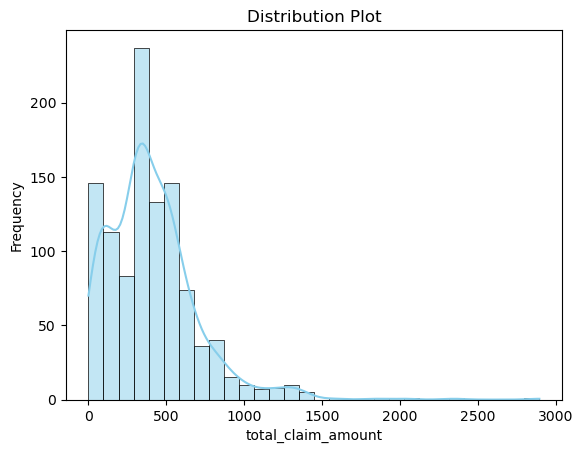

In [298]:
for column in numerical.columns:
    sns.histplot(numerical[column], kde=True, bins=30, color='skyblue', edgecolor='black', linewidth=0.5)
    plt.title('Distribution Plot')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

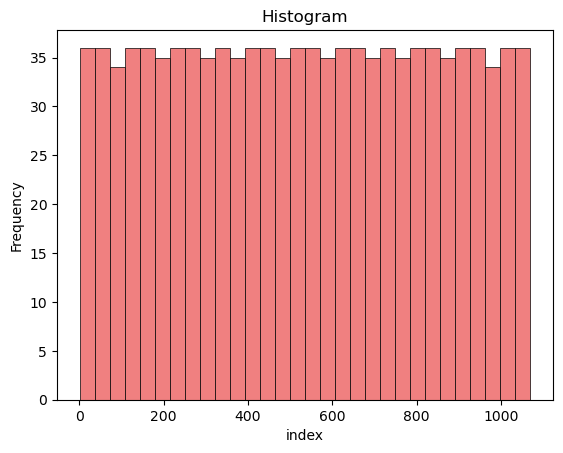

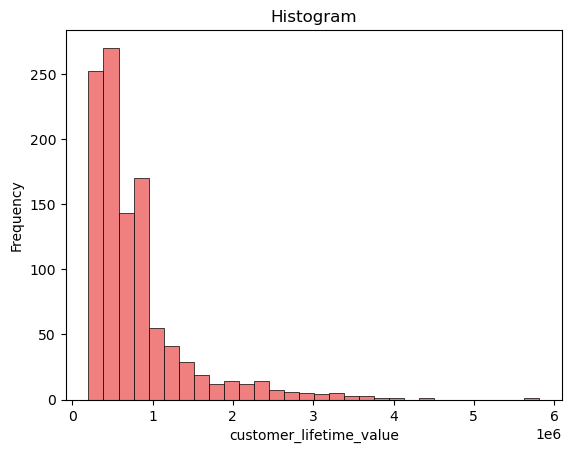

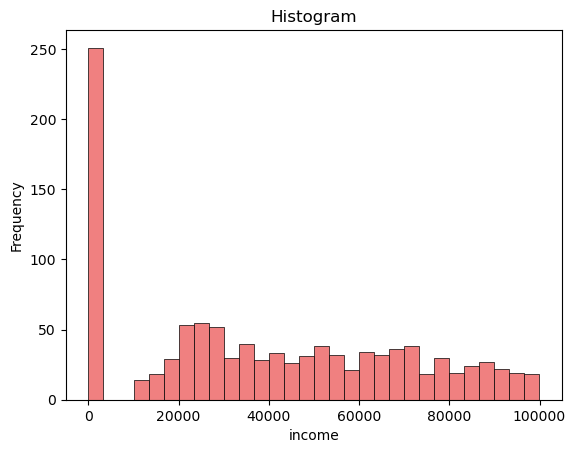

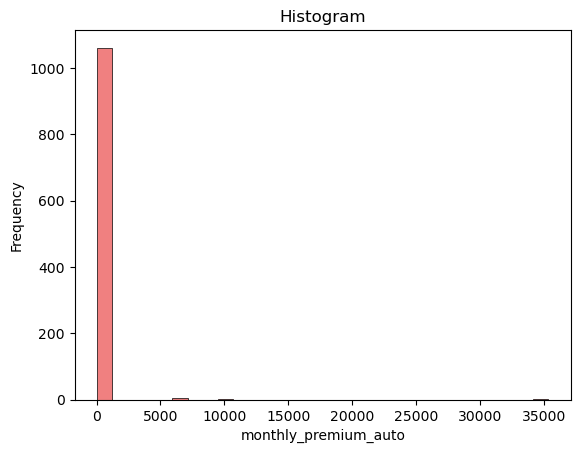

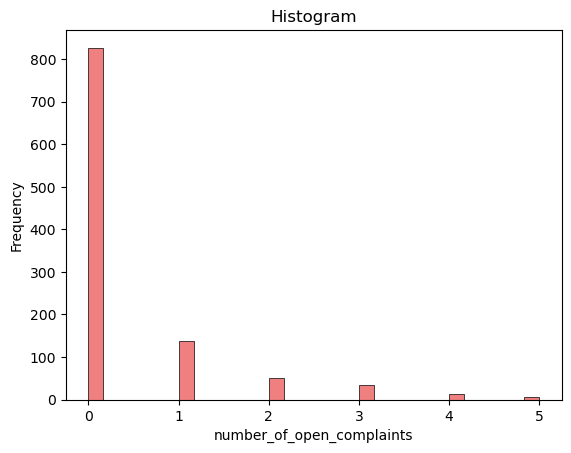

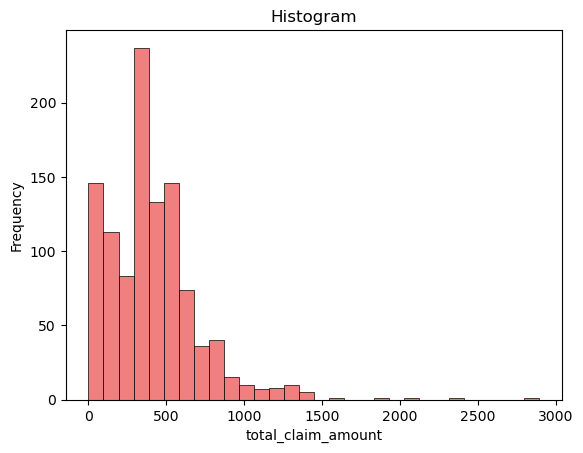

In [299]:
for column in numerical.columns:
    plt.hist(numerical[column], bins=30, color='lightcoral', edgecolor='black', linewidth=0.5)
    plt.title('Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [300]:
#Do the distributions for different numerical variables look like a normal distribution?

# No, none of them look like a normal distribution.

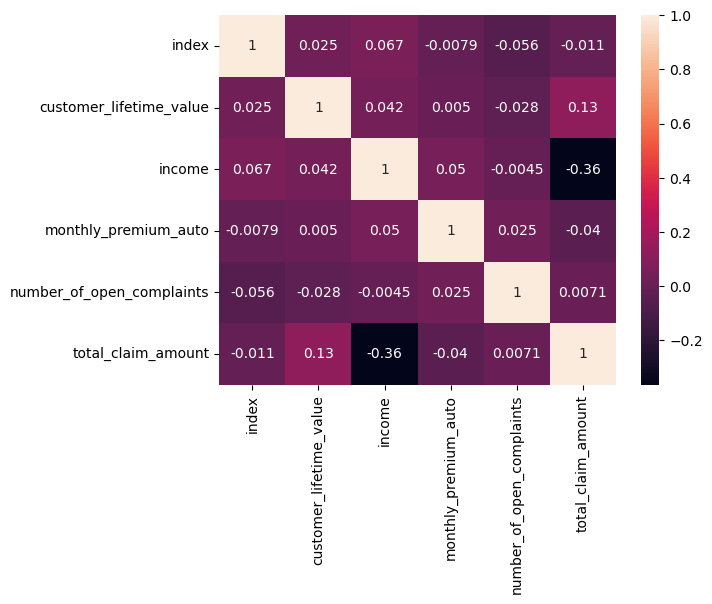

In [301]:
corrMatrix = numerical.corr()

sns.heatmap(corrMatrix, annot=True)
plt.show()

In [302]:
corrMatrix = numerical.corr().T

print("Correlation Matrix:")
print(corrMatrix)

Correlation Matrix:
                              index  customer_lifetime_value    income  \
index                      1.000000                 0.025324  0.067484   
customer_lifetime_value    0.025324                 1.000000  0.041648   
income                     0.067484                 0.041648  1.000000   
monthly_premium_auto      -0.007940                 0.005027  0.049803   
number_of_open_complaints -0.056033                -0.028155 -0.004455   
total_claim_amount        -0.011085                 0.131686 -0.363539   

                           monthly_premium_auto  number_of_open_complaints  \
index                                 -0.007940                  -0.056033   
customer_lifetime_value                0.005027                  -0.028155   
income                                 0.049803                  -0.004455   
monthly_premium_auto                   1.000000                   0.025299   
number_of_open_complaints              0.025299                   1.000

In [303]:
# There is no pair of features that have a high correlation (> 0.9)


In [304]:
#data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1068.0,535.504682,308.688256,1.000000,268.75000,535.500,802.2500,1.070000e+03
customer_lifetime_value,1068.0,793690.259345,643478.410278,200435.070000,403407.99500,588174.235,896287.1975,5.816655e+06
income,1068.0,39315.411985,30484.373979,0.000000,14072.00000,36226.000,64668.7500,9.996000e+04
monthly_premium_auto,1068.0,192.691948,1603.241719,61.000000,68.00000,82.500,109.2500,3.535400e+04
number_of_open_complaints,1068.0,0.395131,0.884764,0.000000,0.00000,0.000,0.0000,5.000000e+00
total_claim_amount,1068.0,405.870113,292.917158,0.382107,204.07146,355.200,532.8000,2.893240e+03


In [305]:
# X-y Split
X = data.drop('total_claim_amount', axis=1)  
y = data['total_claim_amount']  

In [307]:
# Scaling (numerical)

numeric_features = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_features]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_numeric)

# first rows of the scaled features:
print("Scaled Features:")
print(pd.DataFrame(X_scaled, columns=numeric_features).head())

Scaled Features:
      index  customer_lifetime_value    income  monthly_premium_auto  \
0 -1.732347                -0.148850 -1.290295             -0.061587   
1 -1.729106                 0.769699  0.310192             -0.052850   
2 -1.725865                -0.045250 -1.290295             -0.054098   
3 -1.722624                -0.400174 -0.097092             -0.077811   
4 -1.719383                 0.049659  0.774090             -0.077187   

   number_of_open_complaints  
0                  -0.446804  
1                  -0.446804  
2                  -0.446804  
3                  -0.446804  
4                  -0.446804  
